In [347]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
raw = pd.read_csv('raw.csv')

In [253]:
raw.head()

,Gene ID,tAIg,cTE,nTE,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),...,RNAPII - Bahler,SR - Mata (1),SR - Mata (2),SR - Mata (3),SR - Mata (4),SR - Cramer,SR - Mata (5),SR - Gagneur,AB - Cramer,AB - Bahler
0,SPAC1002.01,"0,3383979458","43,57541899","44,69273743","28,498022","35,42291","17,15380622","11,67998309","20,95570102","38,30908037",...,"0,7455","0,01118841522","0,009001171927","0,1256868642","0,1770016879","0,1070464956","0,008323032033",NaN,"2,648949961","0,46"
1,SPAC1002.02,"0,3714650177","48,47161572","51,9650655","27,874361","21,904829","36,8905005","14,76774159","19,69192301","32,34324641",...,"1,1885","0,09449397911","0,1202455991","0,1301961029","0,2781753024","0,2646213198","0,08143769035",NaN,"6,939295831","3,8"
2,SPAC1002.03c,"0,379757742","48,42903575","50,37919827","19,19107","15,344319","62,67273878","16,02643814","106,9583783","47,75721661",...,"0,8415","0,2600511436","0,3252447828","0,07234980014","0,2090651336","0,110843892","0,10450064","0,2036659878","8,534019085","7,2"
3,SPAC1002.04c,"0,343139705","40,70351759","41,20603015","39,61723","41,58403","47,13793676","20,26189733","16,77095129","26,73105964",...,"1,582","0,02449454575","0,02333602714","0,09321003322","0,1811225768","0,4967445572","0,03630256585","0,3067484663","10,81637064","1,4"
4,SPAC1002.05c,"0,3393839585","41,25874126","43,4965035","23,26827","26,40201","62,24920756","27,91529342","14,87432043","20,38780573",...,"0,8435","0,0154904741","0,01365185961","0,03144959938","0,05662211497","0,1266486367","0,01767902533","0,1118568233","2,682726295","0,52"


In [255]:
raw.columns

Index(['Gene ID', 'tAIg', 'cTE', 'nTE', 'HL - Mata (1)', 'HL - Mata (2)',
       'HL - Mata (3)', 'HL - Mata (4)', 'HL - Cramer', 'HL - Mata (5)',
       'HL - Gagneur', 'RNAPII - Bahler', 'SR - Mata (1)', 'SR - Mata (2)',
       'SR - Mata (3)', 'SR - Mata (4)', 'SR - Cramer', 'SR - Mata (5)',
       'SR - Gagneur', 'AB - Cramer', 'AB - Bahler'],
      dtype='object')

In [257]:
test=['Gene ID']
for i in raw.columns:
    if 'HL' in i:
        test.append(i)

In [259]:
altered = raw[test]

In [261]:
altered.head()

,Gene ID,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
0,SPAC1002.01,"28,498022","35,42291","17,15380622","11,67998309","20,95570102","38,30908037",NaN
1,SPAC1002.02,"27,874361","21,904829","36,8905005","14,76774159","19,69192301","32,34324641",NaN
2,SPAC1002.03c,"19,19107","15,344319","62,67273878","16,02643814","106,9583783","47,75721661","34,73"
3,SPAC1002.04c,"39,61723","41,58403","47,13793676","20,26189733","16,77095129","26,73105964","3,72"
4,SPAC1002.05c,"23,26827","26,40201","62,24920756","27,91529342","14,87432043","20,38780573","2,3"


In [263]:
altered = altered.dropna()

In [267]:
def change_sep(ele):
    if ',' in ele:
        return float(ele.replace(',','.'))
    else:
        return float(ele)

In [287]:
converted=altered[altered.columns[1:]].map(change_sep)

In [297]:
values = {}
for column in converted.columns[1:]:
    cl = converted[column]
    values[column] = {
        "min": cl.min(),
        "max": cl.max(),
        "mean": cl.mean(),
        "median": cl.median()
    }

In [367]:
#Tutej są te mediany i pierdu pierdu
stats=pd.DataFrame(values)
stats

,HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
min,3.151780,14.167812,4.441186,8.697441,11.773606,0.010000
max,112.351250,33927.312130,109.792505,23843.292600,120.918646,89.630000
mean,25.949852,105.178244,24.204297,81.781577,34.199925,14.009393
median,24.201792,62.145712,22.645546,42.484813,30.737055,11.640000


In [333]:
converted.insert(0, 'Gene ID', altered['Gene ID'])

In [337]:
converted.head()

,Gene ID,HL - Mata (1),HL - Mata (2),HL - Mata (3),HL - Mata (4),HL - Cramer,HL - Mata (5),HL - Gagneur
2,SPAC1002.03c,19.191070,15.344319,62.672739,16.026438,106.958378,47.757217,34.73
3,SPAC1002.04c,39.617230,41.584030,47.137937,20.261897,16.770951,26.731060,3.72
4,SPAC1002.05c,23.268270,26.402010,62.249208,27.915293,14.874320,20.387806,2.30
6,SPAC1002.07c,97.343420,48.126420,118.339475,29.680160,234.899045,72.586006,63.65
7,SPAC1002.08c,14.683819,19.033169,38.266494,17.830402,13.297744,15.983619,3.80


In [359]:
melted = converted.melt(id_vars=["Gene ID"], var_name="Dataset", value_name="HL")

In [365]:
melted.head()

,Gene ID,Dataset,HL
0,SPAC1002.03c,HL - Mata (1),19.191070
1,SPAC1002.04c,HL - Mata (1),39.617230
2,SPAC1002.05c,HL - Mata (1),23.268270
3,SPAC1002.07c,HL - Mata (1),97.343420
4,SPAC1002.08c,HL - Mata (1),14.683819


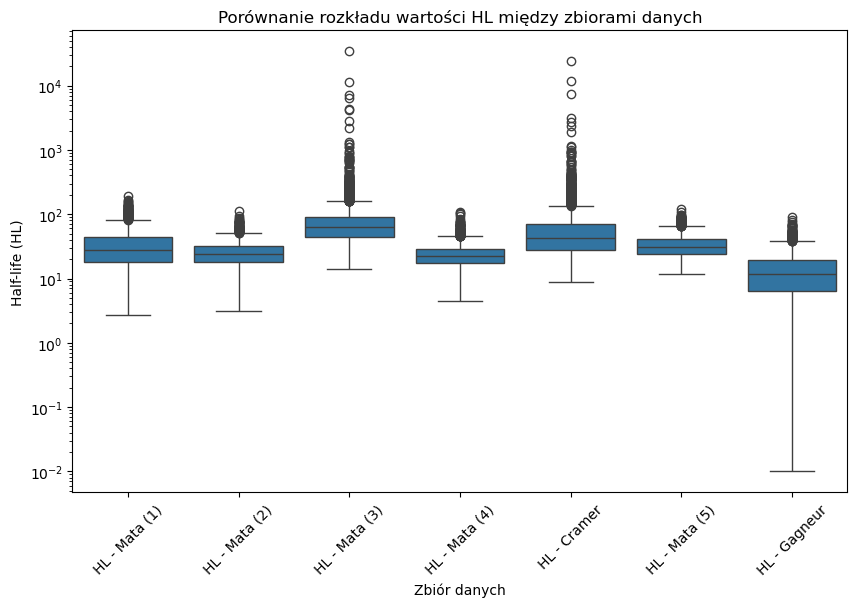

In [377]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Dataset", y="HL", data=melted)
plt.xticks(rotation=45)
plt.xlabel("Zbiór danych")
plt.yscale('log')
plt.ylabel("Half-life (HL)")
plt.title("Porównanie rozkładu wartości HL między zbiorami danych")
plt.show()